In [ ]:
import cv2
import numpy as np
import os
from PIL import Image

# Load a sample image (using OpenCV sample image or any available image)
image_path = '/WhatsApp Image 2025-02-05 at 11.10.54_bf36262c.jpg'  # Replace with an actual image if needed
image = cv2.imread(image_path)

# Ensure image is loaded
if image is None:
    raise FileNotFoundError("Image not found. Please provide a valid image path.")

# Save original image size
original_size = os.path.getsize(image_path)

# Lossless Compression - Save as PNG
lossless_path = 'compressed_lossless.png'
cv2.imwrite(lossless_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 2])
lossless_size = os.path.getsize(lossless_path)

# Lossy Compression - Save as JPEG with quality factor 70
lossy_path = 'compressed_lossy_70.jpg'
cv2.imwrite(lossy_path, image, [cv2.IMWRITE_JPEG_QUALITY, 70])
lossy_size_70 = os.path.getsize(lossy_path)

# Lossy Compression - Save as WebP with quality factor 70
webp_path = 'compressed_lossy_70.webp'
cv2.imwrite(webp_path, image, [cv2.IMWRITE_WEBP_QUALITY, 70])
webp_size_70 = os.path.getsize(webp_path)

# PCA-Based Compression
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
U, S, Vt = np.linalg.svd(image_gray, full_matrices=False)
k = 50  # Number of principal components to keep
compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
pca_path = 'compressed_pca.jpg'
cv2.imwrite(pca_path, compressed_image)
pca_size = os.path.getsize(pca_path)

# Print results
print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"Lossless PNG Size: {lossless_size / 1024:.2f} KB")
print(f"Lossy JPEG Size (Quality 70): {lossy_size_70 / 1024:.2f} KB")
print(f"Lossy WebP Size (Quality 70): {webp_size_70 / 1024:.2f} KB")
print(f"PCA-Based Compression Size: {pca_size / 1024:.2f} KB")

# Ensure PNG compression does not increase size unnecessarily
if lossless_size > original_size:
    print("Warning: Lossless PNG compression increased the file size. Consider using a different format.")


Original Image Size: 46.68 KB
Lossless PNG Size: 269.99 KB
Lossy JPEG Size (Quality 70): 45.78 KB
Lossy WebP Size (Quality 70): 30.94 KB
PCA-Based Compression Size: 82.64 KB


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.8880 - loss: 0.3630 - val_accuracy: 0.9829 - val_loss: 0.0547
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9859 - loss: 0.0465 - val_accuracy: 0.9889 - val_loss: 0.0341
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.9910 - val_loss: 0.0297
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0.9904 - val_loss: 0.0324
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9943 - loss: 0.0193 - val_accuracy: 0.9912 - val_loss: 0.0298
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.9906 - val_loss: 0.0299
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 0.9902 - val_loss: 0.0346
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9968 - loss: 0.0104 - 

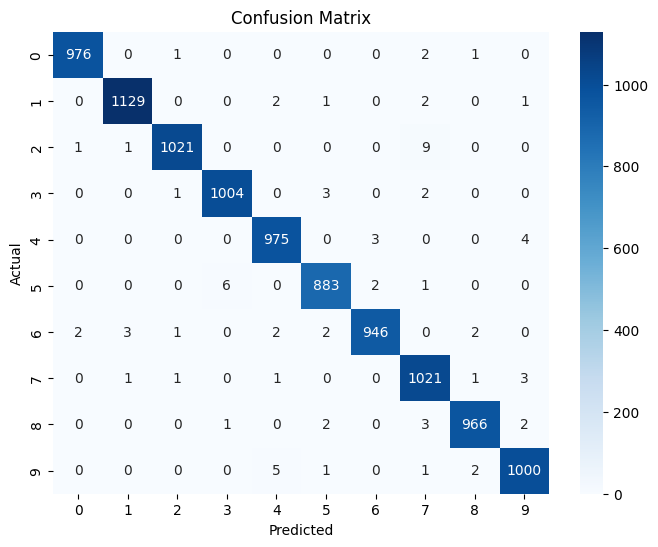

AUC Score: 0.9999
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.82      0.82      0.82      1000
           2       0.58      0.60      0.59      1000
           3       0.47      0.53      0.50      1000
           4       0.69      0.61      0.65      1000
           5       0.58      0.57      0.57      1000
           6       0.76      0.78      0.77      1000
           7       0.74      0.73      0.73      1000
           8       0.78      0.83      0.80      1000
           9       0.75      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



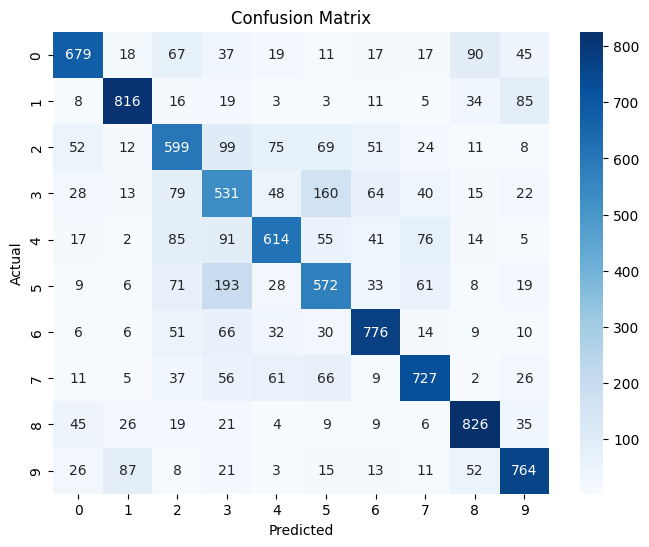

AUC Score: 0.9466


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
x_train_cifar = x_train_cifar.astype("float32") / 255.0
x_test_cifar = x_test_cifar.astype("float32") / 255.0

# Convert labels to categorical
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train_cifar = keras.utils.to_categorical(y_train_cifar, num_classes)
y_test_cifar = keras.utils.to_categorical(y_test_cifar, num_classes)

# Define CNN model
def create_cnn(input_shape, num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate on MNIST
model_mnist = create_cnn((28, 28, 1), num_classes)
history_mnist = model_mnist.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

# Train and evaluate on CIFAR-10
model_cifar = create_cnn((32, 32, 3), num_classes)
history_cifar = model_cifar.fit(x_train_cifar, y_train_cifar, epochs=50, batch_size=64, validation_data=(x_test_cifar, y_test_cifar))

# Predictions and Evaluation
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
    print(f'AUC Score: {auc_score:.4f}')

# Evaluate both models
evaluate_model(model_mnist, x_test, y_test)
evaluate_model(model_cifar, x_test_cifar, y_test_cifar)
